https://www.perplexity.ai/search/224a180b-342f-4bcd-adce-643351daee12

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('world.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187885 entries, 0 to 187884
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              187885 non-null  int64  
 1   iso_code        187885 non-null  object 
 2   洲名              187885 non-null  object 
 3   國家              187885 non-null  object 
 4   日期              187885 non-null  object 
 5   總確診數            187885 non-null  int64  
 6   新增確診數           187885 non-null  int64  
 7   七天移動平均新增確診數     187885 non-null  float64
 8   總死亡數            187885 non-null  int64  
 9   新增死亡數           187885 non-null  int64  
 10  七天移動平均新增死亡數     187885 non-null  float64
 11  每百萬人確診數         187885 non-null  float64
 12  每百萬人死亡數         187885 non-null  float64
 13  傳染率             187885 non-null  float64
 14  新增檢驗件數          187885 non-null  int64  
 15  總檢驗件數           187885 non-null  int64  
 16  每千人檢驗件數         187885 non-null  float64
 17  七天移動平均新增檢驗

In [2]:
allDataFrame = df.reindex(columns=['洲名','國家','日期','總確診數','新增確診數','總人口數','解封指數'])
allDataFrame

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
0,亞洲,阿富汗,2020-02-24,5,5,39835428,99999.0
1,亞洲,阿富汗,2020-02-25,5,0,39835428,99999.0
2,亞洲,阿富汗,2020-02-26,5,0,39835428,99999.0
3,亞洲,阿富汗,2020-02-27,5,0,39835428,99999.0
4,亞洲,阿富汗,2020-02-28,5,0,39835428,99999.0
...,...,...,...,...,...,...,...
187880,非洲,辛巴威,2022-07-02,255586,0,15092171,99999.0
187881,非洲,辛巴威,2022-07-03,255586,0,15092171,99999.0
187882,非洲,辛巴威,2022-07-04,255726,140,15092171,99999.0
187883,非洲,辛巴威,2022-07-05,255755,29,15092171,99999.0


In [3]:
country_mask = allDataFrame['國家'] == '台灣'
taiwan_df = allDataFrame[country_mask]
taiwan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 163986 to 164888
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   洲名      903 non-null    object 
 1   國家      903 non-null    object 
 2   日期      903 non-null    object 
 3   總確診數    903 non-null    int64  
 4   新增確診數   903 non-null    int64  
 5   總人口數    903 non-null    int64  
 6   解封指數    903 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 56.4+ KB


### 搜尋的方法query(字串)

In [ ]:
taiwan_df = allDataFrame.query('國家=="台灣"')
japan_df = allDataFrame.query('國家=="日本"')

taiwan1_df = taiwan_df.query('日期>="2020-01-16" and 日期<="2022-07-06"')
japan1_df = japan_df.query('日期>="2020-01-16" and 日期<="2022-07-06"')

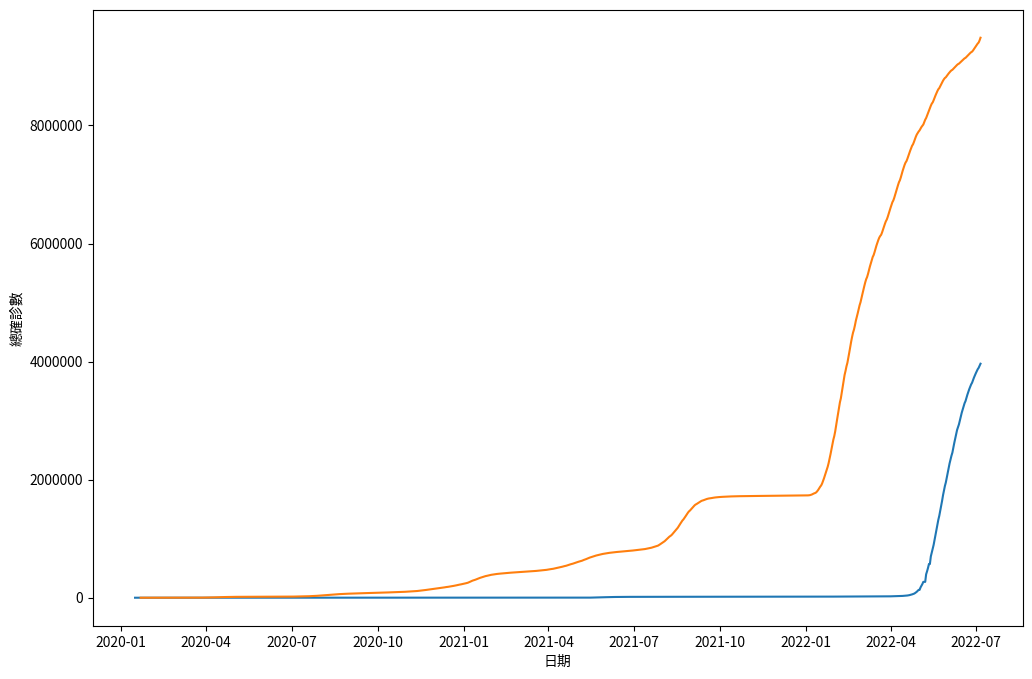

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font',family='ChineseFont')
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(taiwan1_df['日期']),taiwan1_df['總確診數'])
plt.plot(pd.to_datetime(japan1_df['日期']),japan1_df['總確診數'])
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel('日期')
plt.ylabel('總確診數')
plt.show()

In [24]:
taiwan1_df['總確診數']

163986          0
163987          0
163988          0
163989          0
163990          0
           ...   
164884    3837856
164885    3870528
164886    3893643
164887    3929627
164888    3964188
Name: 總確診數, Length: 903, dtype: int64